# Grid To Grid manipulation

<!-- SUMMARY: Grid to Grid transformations  -->

<!-- CATEGORY: Data_Base_Management -->

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import gstlearn as gl
import gstlearn.plot as gp
import matplotlib.pyplot as plt

Setting some global variables

In [2]:
# Set the Global Options
verbose = True
flagGraphic = True

# Define the Space Dimension
ndim = 2
gl.defineDefaultSpace(gl.ESpaceType.RN, ndim)

# Set the Seed for the Random Number generator
gl.law_set_random_seed(5584)

We first define a 2-D grid with 150 x 100 nodes (unit mes size)

In [3]:
nx = 150
ny = 100
grid = gl.DbGrid.create([nx,ny])

On this grid we simulation (using Turning Bands method) two variables which will serve as the Top and Bottom for the next steps. For generality, we have truncated the two surfaces arbitrarily. Note taht we did not check that the Top surface is located *above* the Bottom surface, nor that the masked areas coincide.

In [4]:
model = gl.Model.createFromParam(type=gl.ECov.CUBIC, range=30, sill=10.)
err = gl.simtub(None, grid, model, None, 2)
grid.setName("Simu.1","Top")
grid.setName("Simu.2","Bot")

grid["Bot"] = grid["Bot"] + 100
grid["Top"] = grid["Top"] + 110

replace_mask =  grid["Bot"] > 105
grid[np.where(replace_mask),"Bot"] = np.nan

replace_mask =  grid["Top"] < 105
grid[np.where(replace_mask),"Top"] = np.nan

In [5]:
print("Range for Bottom = ",round(np.nanmin(grid["Bot"]),3),round(np.nanmax(grid["Bot"]),3))
print("Range for Top = ",   round(np.nanmin(grid["Top"]),3),round(np.nanmax(grid["Top"]),3))

Range for Bottom =  90.831 105.0
Range for Top =  105.001 119.101


2
150
100
15000
15000


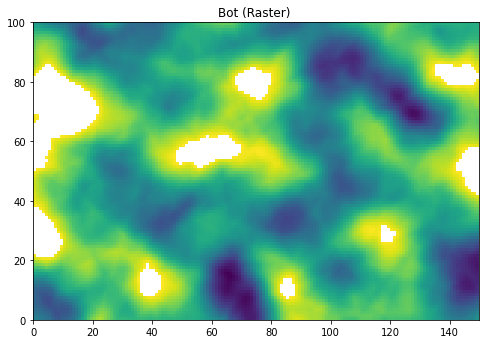

In [6]:
ax = grid.plot("Bot")

2
150
100
15000
15000


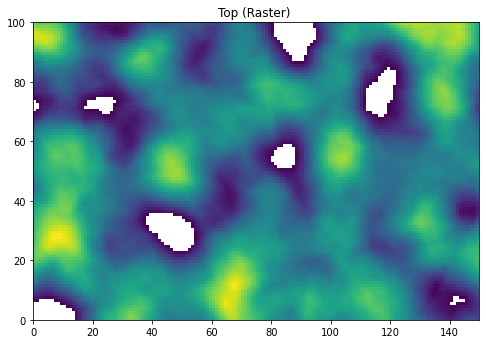

In [7]:
ax = grid.plot("Top")

We now generate the maps of the Variable to be interpolated, with one version corresponding to the Top position and another version for the Bottom position. In order to enhance the interpolation feature, the two versions of this variable are simulated with different textures: short range at the Top and much longer range at the Top

In [8]:
model = gl.Model.createFromParam(type=gl.ECov.CUBIC, range=30, sill=10.)
err = gl.simtub(None, grid, model)
grid.setName("Simu","VBot")

model = gl.Model.createFromParam(type=gl.ECov.SPHERICAL, range=10, sill=3.)
err = gl.simtub(None, grid, model)
grid.setName("Simu","VTop")

2
150
100
15000
15000


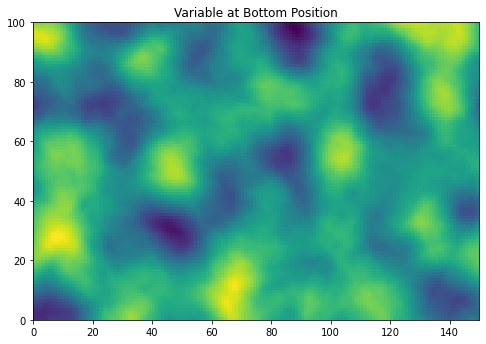

In [9]:
ax = grid.plot("VBot")
ax.decoration(title="Variable at Bottom Position")

2
150
100
15000
15000


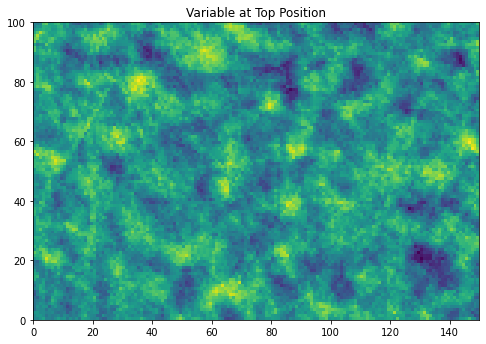

In [10]:
ax = grid.plot("VTop")
ax.decoration(title="Variable at Top Position")

In [11]:
print("Range for Bottom = ",round(np.nanmin(grid["Bot"]),3),round(np.nanmax(grid["Bot"]),3))
print("Range for Top = ",   round(np.nanmin(grid["Top"]),3),round(np.nanmax(grid["Top"]),3))

Range for Bottom =  90.831 105.0
Range for Top =  105.001 119.101


We create a 3D grid which covers the variation of the variables Top and Bot (as simulated above), i.e. from 91 to 119.

In [12]:
nx = 150
ny = 100
nz = 30
g3D = gl.DbGrid.create([nx,ny,nz],x0=[0,0,91])

In [13]:
grid.setLocators(["VBot", "VTop"],gl.ELoc.Z)
err = gl.dbg2gInterpolate(grid, g3D, ["Top"], ["Bot"])

We obtain the following statistics on the newly created variable

In [14]:
dbfmt = gl.DbStringFormat()
dbfmt.setFlags(flag_stats=True)
dbfmt.setNames(["Interpolation"])
g3D.display(dbfmt)


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 3
Number of Columns            = 5
Total number of samples      = 450000

Grid characteristics:
---------------------
Origin :      0.000     0.000    91.000
Mesh   :      1.000     1.000     1.000
Number :        150       100        30

Data Base Statistics
--------------------
5 - Name Interpolation - Locator z1
 Nb of data          =     450000
 Nb of active values =     156484
 Minimum value       =     -6.055
 Maximum value       =      9.049
 Mean value          =      0.861
 Standard Deviation  =      2.189
 Variance            =      4.790

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = x3 - Locator = x3
Column = 4 - Name = Interpolation - Locator = z1


Let us now visualize some horizontal slices of the 3-D grid.

3
150
100
15000
15000
3
150
100
15000
15000
3
150
100
15000
15000
3
150
100
15000
15000


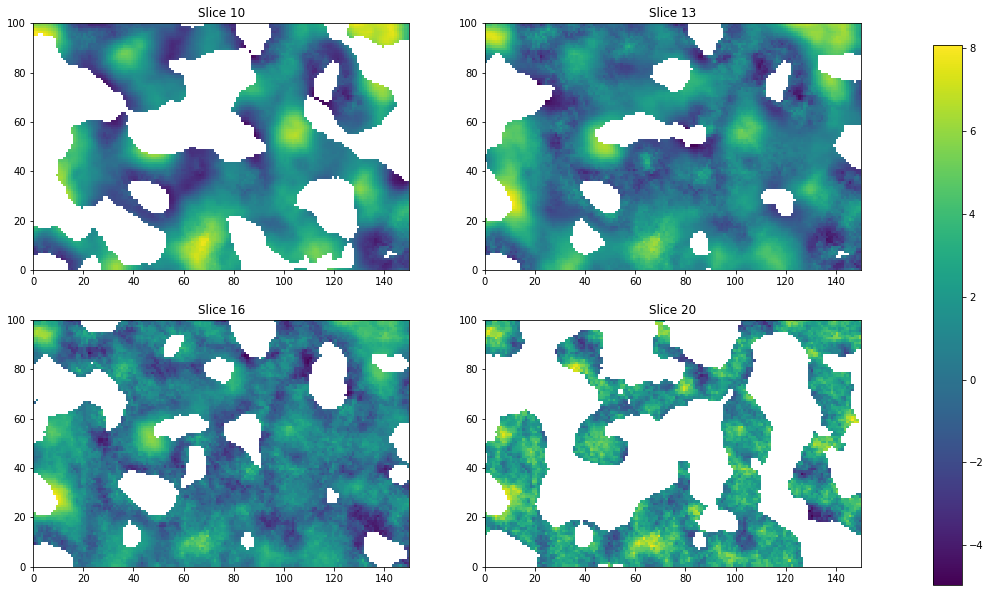

In [15]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
axs[0,0].gstgrid(g3D,corner=[0,0,10], flagLegendRaster = False)
axs[0,0].decoration(title="Slice 10")
axs[0,1].gstgrid(g3D,corner=[0,0,13], flagLegendRaster = False)
axs[0,1].decoration(title="Slice 13")
axs[1,0].gstgrid(g3D,corner=[0,0,16], flagLegendRaster = False)
axs[1,0].decoration(title="Slice 16")
axs[1,1].gstgrid(g3D,corner=[0,0,20], flagLegendRaster = False)
axs[1,1].decoration(title="Slice 20")

fig.subplots_adjust(right=0.7)
cbar_ax = fig.add_axes([0.75, 0.1, 0.02, 0.75])

im = axs[0,0].collections[0] # get mappable described by the colorbar
err = fig.colorbar(im, cax = cbar_ax)